In [28]:
import os

Загрузите нужные библиотеки:
    - pandas, numpy, matplotlib
    - pipelines, стандартизацию, линейную регрессию, гребневую и лассо регрессию с sklearn
    - загрузит cross validation вариант этих регрессий
    - также загрузите standart scaler, пайплайны и polynomial features

In [29]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

Используйте магическую комманду в notebook чтобы активировать прорисовку matplotlib графиков

In [30]:
%matplotlib inline

Поставьте стиль matplotlib **'seaborn'**

In [31]:
plt.style.use('seaborn')

Данные по оценкам ресторанам из HDF5 файла который вы сохранили вчера

In [32]:
# -- ваш код здесь -- 
df = pd.read_hdf('data.h5')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,av_rating,Rating color,Rating text,Votes
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238
2565,18414465,Mezbaan Grills,1,New Delhi,"A- 96, Shri Aurbindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198122,28.538134,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,Average,8
2566,304243,Say Cheese,1,New Delhi,"88/3, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198159,28.537448,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.7,Orange,Average,64
2567,3554,Southy,1,New Delhi,"88/4, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.197950,28.537474,South Indian,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.6,Orange,Average,113
2568,18369872,Monosoz,1,New Delhi,"Sri Aurobindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198042,28.538394,Pizza,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.7,Yellow,Good,66
2569,948,Waves,1,New Delhi,"A-4, Sarvodaya Enclave, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198808,28.538666,"North Indian, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.5,Yellow,Good,141
2570,2853,Delhi Darbar,1,New Delhi,"84, Main Road, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196967,28.535763,"Chinese, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.2,Red,Poor,77


Сегодня мы решаем задачу классификации поэтому мы будем предсказывать колонку Rating Text <br>
Стоит иметь ввиду что тут есть ранкинг между значениями - так **Very Good > Good > Average**. <br>
Поэтому надо это учесть и преобразовать этот вектор в численный вид так чтобы эта информация сохранилась.
Стоить отметить что такой response variable встречается *не часто* и обычно не имеет ранкинг

Преобразуйте вектор ответов в численную форму

In [33]:
from pandas.api.types import CategoricalDtype

In [34]:
# -- ваш код здесь -- 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [35]:
newDF = df
newDF['Rating text'] = encoder.fit_transform(df['Rating text'])
newDF

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,av_rating,Rating color,Rating text,Votes
2561,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,0,46
2562,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,0,45
2563,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,0,11
2564,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,0,238
2565,18414465,Mezbaan Grills,1,New Delhi,"A- 96, Shri Aurbindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198122,28.538134,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,0,8
2566,304243,Say Cheese,1,New Delhi,"88/3, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198159,28.537448,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.7,Orange,0,64
2567,3554,Southy,1,New Delhi,"88/4, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.197950,28.537474,South Indian,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.6,Orange,0,113
2568,18369872,Monosoz,1,New Delhi,"Sri Aurobindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198042,28.538394,Pizza,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.7,Yellow,2,66
2569,948,Waves,1,New Delhi,"A-4, Sarvodaya Enclave, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198808,28.538666,"North Indian, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.5,Yellow,2,141
2570,2853,Delhi Darbar,1,New Delhi,"84, Main Road, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196967,28.535763,"Chinese, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.2,Red,3,77


Уберем такие колонки как av_rating, Rating color, Rating text,	Votes, Country, Locality Verbose

In [36]:
df = df.drop(['av_rating', 'Rating color', 'Rating text', 'Votes', 'Currency', 'City',
              'Country Code', 'Locality Verbose', 'Restaurant ID', 'Address'], axis=1)

Сделайте one-hot-encoding как на первом дз только после этого преобразйуте матрицу X в sparse матрицу

In [37]:
from scipy import sparse

In [38]:
# -- ваш код здесь
df = pd.get_dummies(df).reset_index()
df.head()

,index,Longitude,Latitude,Average Cost for two,Price range,Restaurant Name_#OFF Campus,Restaurant Name_1911 - The Imperial,Restaurant Name_1911 Bar - The Imperial,Restaurant Name_1990's,Restaurant Name_1UP,...,Cuisines_Turkish,"Cuisines_Turkish, Mediterranean, Middle Eastern",Cuisines_Vietnamese,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Switch to order menu_No
0,2561,77.196923,28.535382,350,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
1,2562,77.197475,28.535493,1500,3,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
2,2563,77.198033,28.537547,500,2,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
3,2564,77.196924,28.535523,500,2,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
4,2565,77.198122,28.538134,400,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1


Какая размерность у выборки X?

In [39]:
# -- Ваш ответ здесь -- 
print(df.shape)
print(newDF['Rating text'].values.size)

(4048, 4153)
4048


Как мы видим у нас тут проблема curse of dimensionality так как размерность наших фич значительно больше чем количество данных <br>
#### <center>  Значит сам бог велел использовать Logit!

Разделите выборку на train и test. Поставьте параметр random state 123 и размер тестовой выборки должен быть равен 30%

In [40]:
# -- ваш код здесь -- 
from sklearn.model_selection import train_test_split
y = newDF['Rating text'].values
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Теперь попробуем использовать стандартный из коробки Logit regression, но поставьте random state 123. Также не забудьте про стандартизацию

In [41]:
# -- ваш код здесь -- 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
logit = LogisticRegression()
scaler = StandardScaler()
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
logit.score(X_train, y_train)

0.7398517472643841

In [43]:
logit.score(X_test, y_test)

0.660082304526749

Интересно было бы узнать  насколько мы улучшаем модель увеличивая нашу выборку. Для этого можно использовать функции learning_curve. Для реализации кросс-валидации будем использовать функцию ShuffleSplit. В обоих случаях закрепим random state на 123

In [44]:
from sklearn.model_selection import ShuffleSplit, learning_curve

In [45]:
def plot_learning_curve(estimator, X, y, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    # -- ваш код здесь -- #
    #
    #
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    fig = plt.figure(figsize=(15, 10))
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.4, color="green")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="CV score")
    
    plt.title('Learning Curve')

    plt.xlabel("Size of sample")
    plt.ylabel("Score")
    plt.legend(loc="best")
    return plt

In [46]:
logit = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(random_state=123))

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

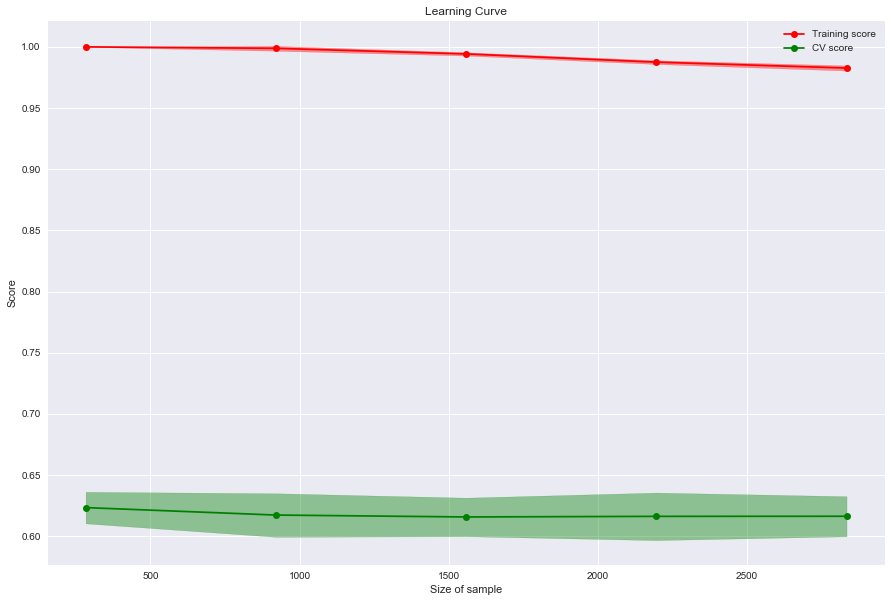

In [47]:
# -- ваш код здесь -- 
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=123)
plot_learning_curve(logit, X, y, cv=cv, n_jobs=-1)

 Видно что модель не увеиличивает свой score на обучающей выборке, но с увеличением размера разница между тестом и трейном падает

Учитывая это имеет смысл использовать модель с более жесткими регулизаторами, чтобы проверить это предположение можно построить кривую которая будет показывать как зависит значение CV accuracy от коэффициента регулярзации $alpha$

In [48]:
from sklearn.model_selection import validation_curve

In [49]:
def plot_validation_curve(estimator, X, y, cv=None,
                        n_jobs=-1, param_name= 'C',
                        param_range= np.linspace(0.0001, 0.04, 100)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fig = plt.figure(figsize=(15, 10))
    
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="red")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.4, color="green")
    plt.plot(param_range, train_scores_mean, 'o-', color="red", label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="green", label="CV score")
    
    plt.title('Vaidation Curve')

    plt.xlabel("value of parameter {param_name}".format(param_name=param_name))
    plt.ylabel("Score")
    plt.legend(loc="best")
    return plt
    

In [50]:
scaler = StandardScaler(with_mean=False)
type(scaler)

sklearn.preprocessing.data.StandardScaler

In [51]:
print(X_train.shape)
X_scaled = scaler.fit_transform(X_train)
print(X_scaled.size)

(2833, 4153)
11765449


<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

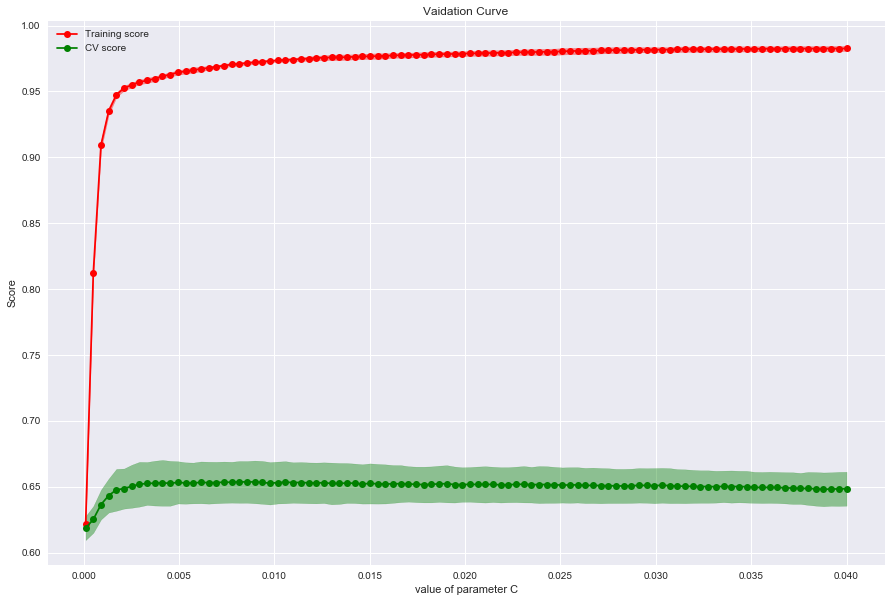

In [52]:
# -- ваш код здесь
plot_validation_curve(LogisticRegression(random_state=123), X_scaled, y_train, cv=cv)

Перерисуем learning curve c новым оптимальным значением С и типом регуляризации

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

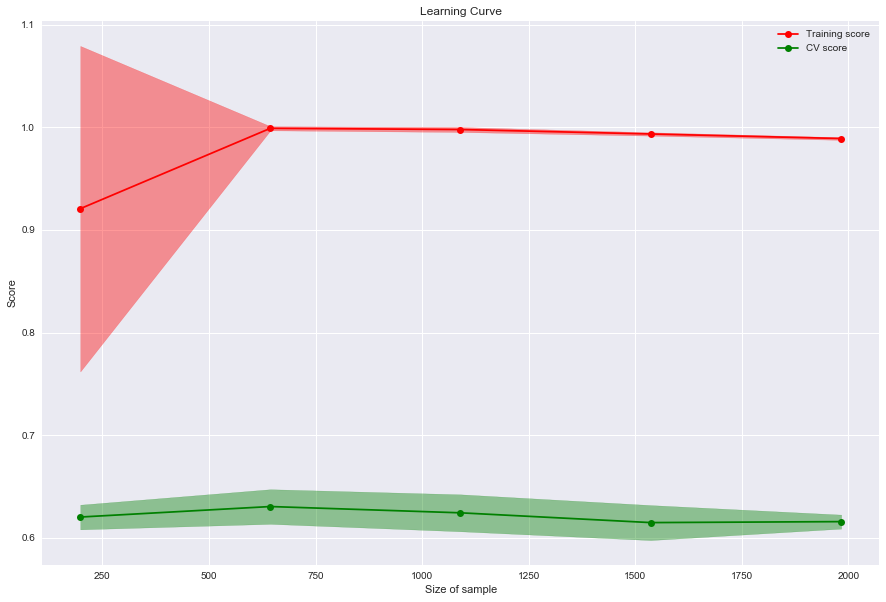

In [53]:
 # -- ваш код здесь
plot_learning_curve(logit, X_scaled, y_train, cv=cv, n_jobs=-1)

# <center> Серебро

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

import scipy.stats

Оптимизируйте логит модель по Randomized Grid Search

Параметры: Random State 123, n_jobs = -1, max_iter=100, solver='lbfgs', cv = 5

Используйте распределение stats.expon со scale 1

# <center> Золото

Будем решать задачу бинарной классификации отзывов IMDB к фильмам. Имеется обучающая выборка с размеченными отзывами, по 12500 отзывов известно, что они хорошие, еще про 12500 – что они плохие. Здесь уже не так просто сразу приступить к машинному обучению, потому что готовой матрицы $X$ нет  – ее надо приготовить. Можно использовать самый простой подход – мешок слов ("Bag of words") или Tfidf преобразование. <br>
При таком подходе признаками отзыва будут индикаторы наличия в нем каждого слова из всего корпуса, где корпус – это множество всех отзывов. Идея иллюстрируется картинкой

Ваши возможные шаги - они **не** обязательны, кроме первого и последнего пункта. Если вы придумаете что то лучше чтобы поднять качество прогноза то это ок, ограничений тут нет, главное получите на тестовой выборке accuracy выше 65%

 - **Разделите выборку на train и тест, random_state поставьте равным 123 а размер тестовой выборки 20%**
 - **Составим словарь всех слов с помощью CountVectorizer.**
 - **Закодируем предложения из текстов обучающей выборки индексами входящих слов. Используем разреженный формат.**

 - **C помощью grid search выберите лучшую модель на кросс-валидации**

 - **Обучите логистическую регрессию.**

 - **ВЫ должны получить долю правильных ответов на тестовой выборке большe 65%**

 - **Если у вас это получилось то вы решили задачу на золото**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [ ]:
%%time
reviews_train = load_files("../aclImdb/train")
text, y = reviews_train.data, reviews_train.target

In [ ]:
#--- Ваш код тут --- **